In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [9]:
def import_vsweep(fpath="schematic/data/dac7_L0.15W1vout-", num=10):
    list_df = []
    for i in range(num):
        df_tmp = pd.read_csv(fpath+str(i+1)+".txt", delimiter="\s+")

        df_tmp["bit"] = df_tmp.index
        df_tmp["v(b0)"] = (df_tmp["v(b0)"] > 1e-3).astype(float)
        df_tmp["v(b1)"] = (df_tmp["v(b1)"] > 1e-3).astype(float)
        df_tmp["v(b2)"] = (df_tmp["v(b2)"] > 1e-3).astype(float)
        df_tmp["v(b3)"] = (df_tmp["v(b3)"] > 1e-3).astype(float)
        df_tmp["v(b4)"] = (df_tmp["v(b4)"] > 1e-3).astype(float)
        df_tmp["v(b5)"] = (df_tmp["v(b5)"] > 1e-3).astype(float)
        df_tmp["v(b6)"] = (df_tmp["v(b6)"] > 1e-3).astype(float)
        df_tmp["src"] = np.ones(len(df_tmp.iloc[:, [1]]))*i
        df_tmp["lsb"] = df_tmp["i(vbias)"]/(3*2**5)
    # my_df = pd.read_csv("sample_data/mcdactut1.txt", delimiter="\s+")
        df_tmp["dnl"] = np.array([df_tmp.lsb.iloc[0]]+list(df_tmp["i(viout)"].iloc[1:].values - df_tmp["i(viout)"].iloc[0:-1].values))-df_tmp["lsb"]
        df_tmp["inl"] = df_tmp["dnl"].cumsum()
        list_df.append(df_tmp)
        
    return pd.concat(list_df).reset_index(drop=True)

In [3]:
my_df = import_vsweep(fpath="schematic/data/dac7_L"+str(3)+"W"+str(12)+"op-", num=10)
# my_df["bit"] = my_df.index
my_df.tail(20)


,vbias#branch,v(b0),v(b1),v(b2),v(b3),v(b4),v(b5),v(b6),i(vbias),i(viout),v(vout),bit,src,lsb,dnl,inl
300,7.380228e-07,0.0,0.0,1.0,1.0,0.0,0.0,0.0,7.380228e-07,1.137069e-07,1.0,12,9.0,7.687737e-09,-6.870301e-10,-2.224550e-08
301,7.380235e-07,1.0,0.0,1.0,1.0,0.0,0.0,0.0,7.380235e-07,1.202859e-07,1.0,13,9.0,7.687745e-09,-1.108687e-09,-2.335419e-08
302,7.380235e-07,0.0,1.0,1.0,1.0,0.0,0.0,0.0,7.380235e-07,1.263004e-07,1.0,14,9.0,7.687745e-09,-1.673328e-09,-2.502752e-08
303,7.380243e-07,1.0,1.0,1.0,1.0,0.0,0.0,0.0,7.380243e-07,1.318963e-07,1.0,15,9.0,7.687753e-09,-2.091860e-09,-2.711938e-08
304,7.380220e-07,0.0,0.0,0.0,0.0,1.0,0.0,0.0,7.380220e-07,1.425110e-07,1.0,16,9.0,7.687729e-09,2.926970e-09,-2.419241e-08
305,7.380228e-07,1.0,0.0,0.0,0.0,1.0,0.0,0.0,7.380228e-07,1.500741e-07,1.0,17,9.0,7.687737e-09,-1.246072e-10,-2.431702e-08
306,7.380228e-07,0.0,1.0,0.0,0.0,1.0,0.0,0.0,7.380228e-07,1.574450e-07,1.0,18,9.0,7.687737e-09,-3.168082e-10,-2.463382e-08
307,7.380236e-07,1.0,1.0,0.0,0.0,1.0,0.0,0.0,7.380236e-07,1.641992e-07,1.0,19,9.0,7.687745e-09,-9.335813e-10,-2.556740e-08
308,7.380227e-07,0.0,0.0,1.0,0.0,1.0,0.0,0.0,7.380227e-07,1.717122e-07,1.0,20,9.0,7.687737e-09,-1.747279e-10,-2.574213e-08
309,7.380235e-07,1.0,0.0,1.0,0.0,1.0,0.0,0.0,7.380235e-07,1.785475e-07,1.0,21,9.0,7.687745e-09,-8.524380e-10,-2.659457e-08


In [54]:
LW_pairs = ([
    (1, 4), (1,3),
    (0.25, 12), (0.5, 12), (3, 12),
    (0.25, 9), (0.5, 9), (3, 9),
    (0.25, 6), (0.5, 6), (3, 6),
    (0.25, 4), (0.5, 4), (3, 4),
    (0.25, 3), (0.5, 3), (3, 3),
    (0.25, 1), (0.5, 1), (3, 1),
])

In [21]:
# LW_pairs = [(1, 4), (1, 3), (1,5), (3, 12), (4, 12), (4, 16), (40, 16), (4, 20), (6, 24)]
LW_pairs = [(8, 32)]
L_list = []
W_list = []
per_list = []
for each in LW_pairs:
    L_list.append(each[0])
    W_list.append(each[1])
#     my_df = import_vsweep(fpath="schematic/data/dac7min_L"+str(each[0])+"W"+str(each[1])+"op-", num=6)
    my_df = import_vsweep(fpath="schematic/data/dac7_LDSW32L8_op-", num=10)
    per_list.append(my_df)

In [11]:
%matplotlib inline

(-5e-09, 5e-09)

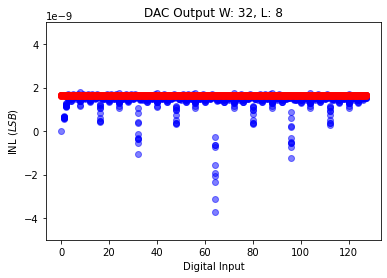

In [22]:
j = -1
fig, ax = plt.subplots()
ax.plot(per_list[j].bit, per_list[j]["i(viout)"].diff().fillna(0), "bo", alpha=0.5)
ax.plot(per_list[j].bit, per_list[j]["i(vbias)"]/96, "ro", alpha=0.5)
ax.set_title("DAC Output W: "+str(W_list[j])+", L: "+str(L_list[j]))
ax.set_xlabel("Digital Input")
ax.set_ylabel("INL ($LSB$)")
ax.set_ylim([-5e-9, 5e-9])

In [23]:
per_list[j]["i(vbias)"]

0       1.569709e-07
1       1.569719e-07
2       1.569719e-07
3       1.569729e-07
4       1.569719e-07
            ...     
1275    1.571861e-07
1276    1.571851e-07
1277    1.571861e-07
1278    1.571861e-07
1279    1.571871e-07
Name: i(vbias), Length: 1280, dtype: float64

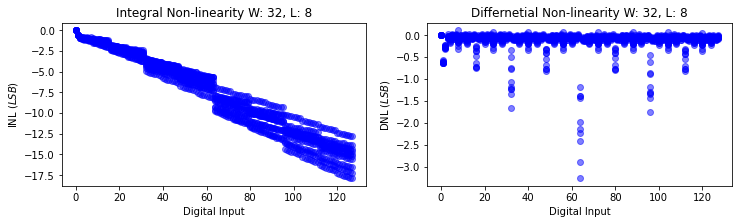

In [24]:
for j in range(len(L_list)):
    fig, ax = plt.subplots(1,2, figsize=(12, 3))
    ax[0].plot(per_list[j].bit, per_list[j].inl/per_list[j].lsb, "bo", alpha=0.5)
    ax[0].set_title("Integral Non-linearity W: "+str(W_list[j])+", L: "+str(L_list[j]))
    ax[0].set_xlabel("Digital Input")
    ax[0].set_ylabel("INL ($LSB$)")
    ax[1].plot(per_list[j].bit, per_list[j].dnl/per_list[j].lsb, "bo", alpha=0.5)
    ax[1].set_title("Differnetial Non-linearity W: "+str(W_list[j])+", L: "+str(L_list[j]))
    ax[1].set_xlabel("Digital Input")
    ax[1].set_ylabel("DNL ($LSB$)")

In [126]:
LW_pairs = ([
    (1, 4), (1,3),
    (0.25, 12), (0.5, 12), (3, 12),
    (0.25, 9), (0.5, 9), (3, 9),
    (0.25, 6), (0.5, 6), (3, 6),
    (0.25, 4), (0.5, 4), (3, 4),
    (0.25, 3), (0.5, 3), (3, 3),
    (0.25, 1), (0.5, 1), (3, 1),
])
L_list = []
W_list = []
per_list = []
for each in LW_pairs:
    L_list.append(each[0])
    W_list.append(each[1])
    my_df = import_vsweep(fpath="schematic/data/dac7_L"+str(each[0])+"W"+str(each[1])+"op-", num=10)
    per_list.append(my_df)

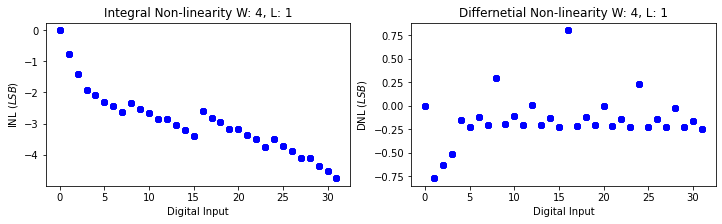

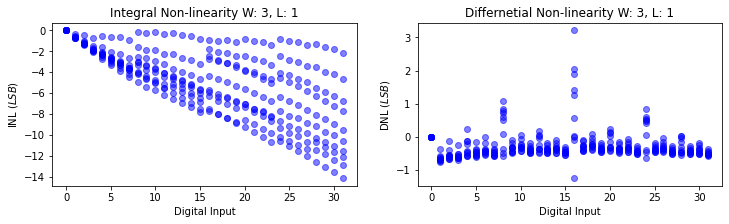

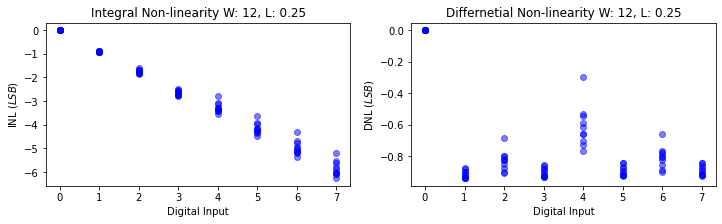

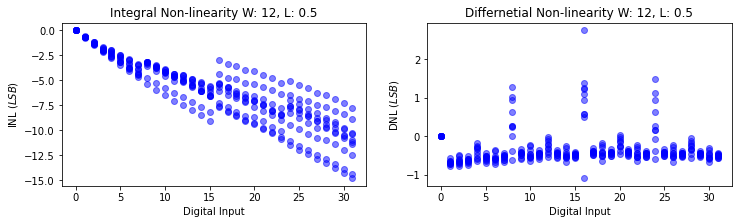

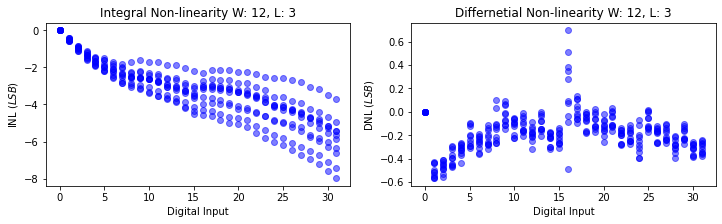

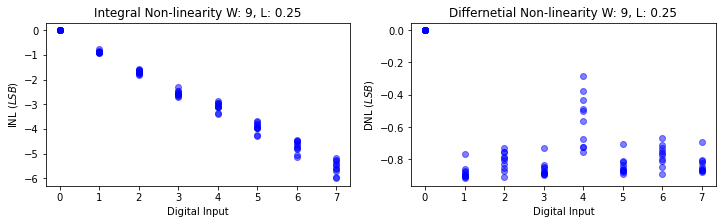

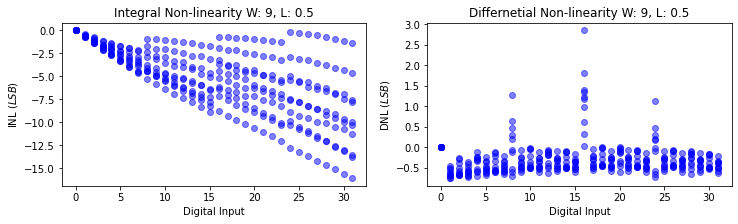

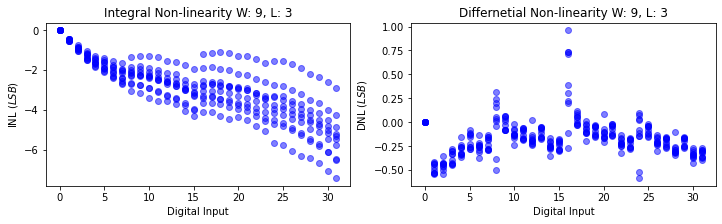

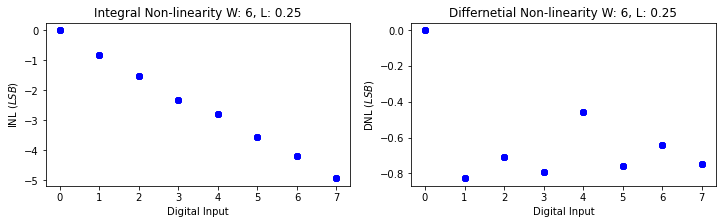

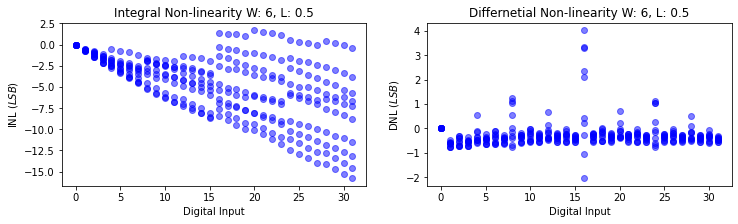

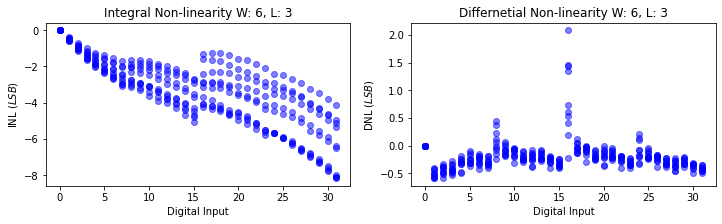

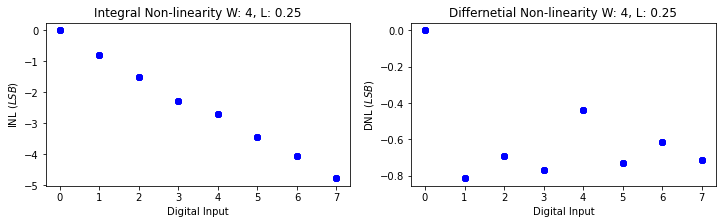

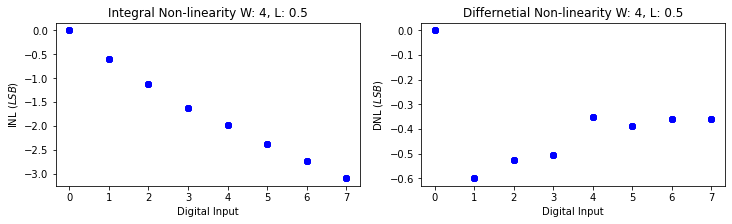

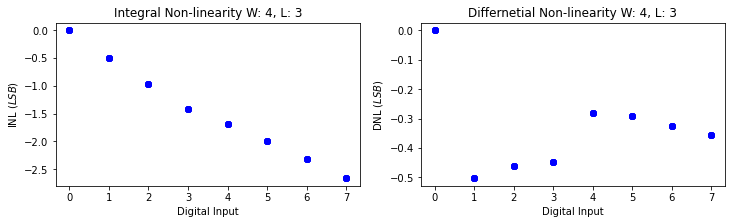

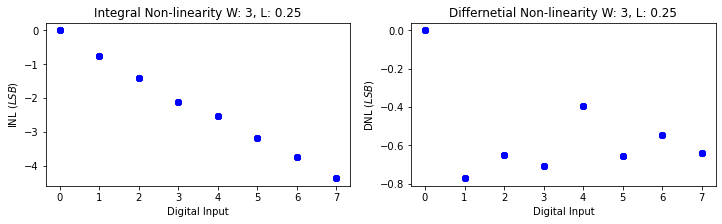

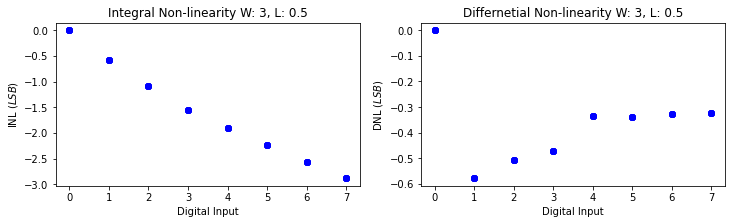

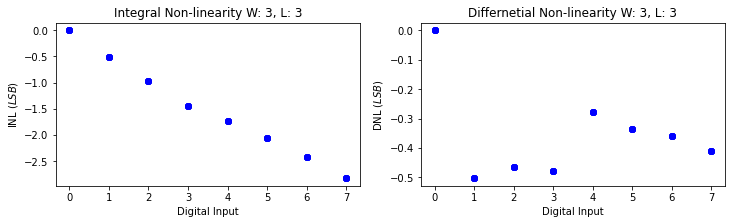

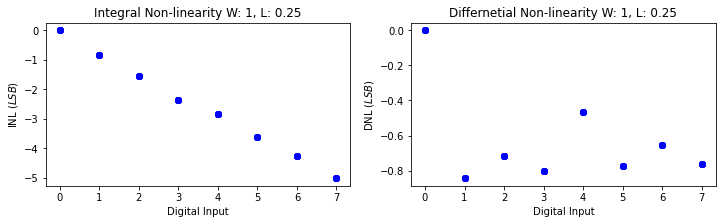

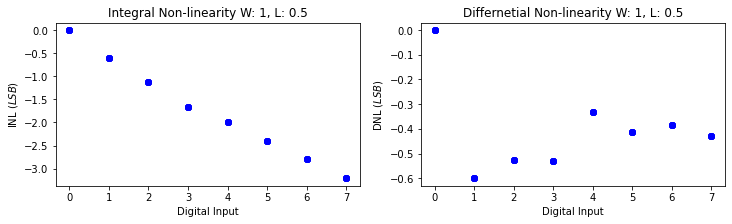

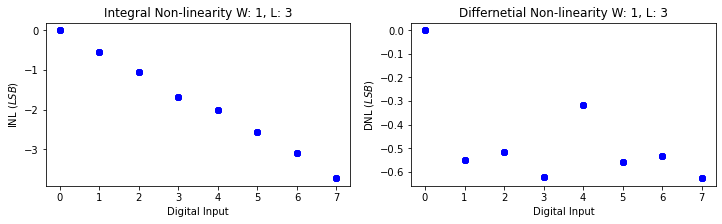

In [18]:
for j in range(len(L_list)):
    fig, ax = plt.subplots(1,2, figsize=(12, 3))
    ax[0].plot(per_list[j].bit, per_list[j].inl/per_list[j].lsb, "bo", alpha=0.5)
    ax[0].set_title("Integral Non-linearity W: "+str(W_list[j])+", L: "+str(L_list[j]))
    ax[0].set_xlabel("Digital Input")
    ax[0].set_ylabel("INL ($LSB$)")
    ax[1].plot(per_list[j].bit, per_list[j].dnl/per_list[j].lsb, "bo", alpha=0.5)
    ax[1].set_title("Differnetial Non-linearity W: "+str(W_list[j])+", L: "+str(L_list[j]))
    ax[1].set_xlabel("Digital Input")
    ax[1].set_ylabel("DNL ($LSB$)")